This project's objective is to analyse the HR department's data and develop a model that predicts whether or not an employee will exit the company.

For every business, predicting employees likely to quit is essential. It might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will benefit the company.

For this project I will be using Tree-based Machine Learning model.

## Step 1. Imports
#### Import packages
#### Load dataset

##### Import packages

In [36]:
#  Load libraries

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

##### Load dataset

In [2]:
# b) Load dataset
hr0 = pd.read_csv("hr.csv")
hr0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Summarize Data 
### Data Exploration (Initial EDA and data cleaning)
Understand your variables
Clean your dataset (missing data, redundant data, outliers)

#### Gather basic information about the data

In [3]:
hr0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr0.size

149990

In [5]:
hr0.shape

(14999, 10)

In [6]:
hr0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Gather descriptive statistics about the data

In [7]:
hr0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

#### Renaming columns

I will rename the columns as needed,standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
hr0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Renaming columns

hr0 = hr0.rename(columns={'Work_accident':'work_accident', 'average_montly_hours':'average_monthly_hours',
                          'time_spend_company':'tenure', 'Department':'department'})

# Displaying all column names after the update

hr0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Checking for missing values

In [10]:
# Check for missing values
hr0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

From the output, there are no missing values in the data.

#### Checking for duplicates

In [11]:
# Check for duplicates
hr0.duplicated().sum()

3008

The dataset contains 3008 duplicated rows. This means 20% of the rows is duplicated

In [12]:
# Inspect some rows containing duplicates
hr0[hr0.duplicated()].head(n=10)

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

The above output shows the first ten occurences of rows that are duplicated farther down in the dataframe.

In [13]:
# Droping duplicates and saving resulting dataframe in a new variable

hr1 = hr0.drop_duplicates(keep ='first')

# Displaying first few rows of new dataframe

hr1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

#### Checking for outliers

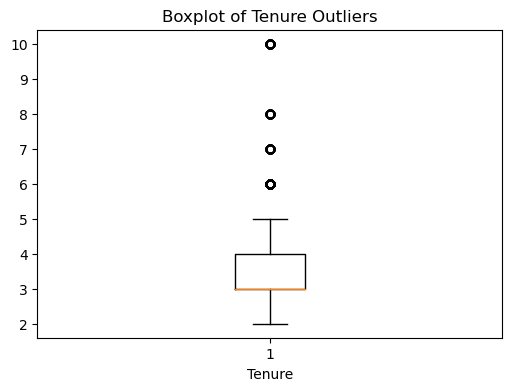

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize=(6,4))
plt.boxplot(hr1['tenure'])
plt.title('Boxplot of Tenure Outliers')
plt.xlabel('Tenure')
plt.show()

The boxplot above shows that there are outliers in the tenure variable

In [15]:
# Determining the number of rows containing outliers

# Calculate the interquartile range (IQR)
Q1 = hr1['tenure'].quantile(0.25)
Q3 = hr1['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)


# Find the number of rows containing outliers
outliers = len(hr1[(hr1['tenure'] < lower_limit) | (hr1['tenure'] > upper_limit)])

# Display the number of rows containing outliers
print("Number of rows containing outliers in 'tenure' variable:", outliers)


Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in 'tenure' variable: 824


In [16]:
# Numbers of people who left vs. stayed
print(hr1['left'].value_counts())
print(' ')

# Fractions of people who left vs. stayed
print(hr1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
 
0    0.833959
1    0.166041
Name: left, dtype: float64


#### Data visualizations

To create plots to visualize relationships between variables in the data,I will create a boxplot showing [average_monthly_hours] distributions for [number_project], comparing the distributions of employees who stayed versus those who left.

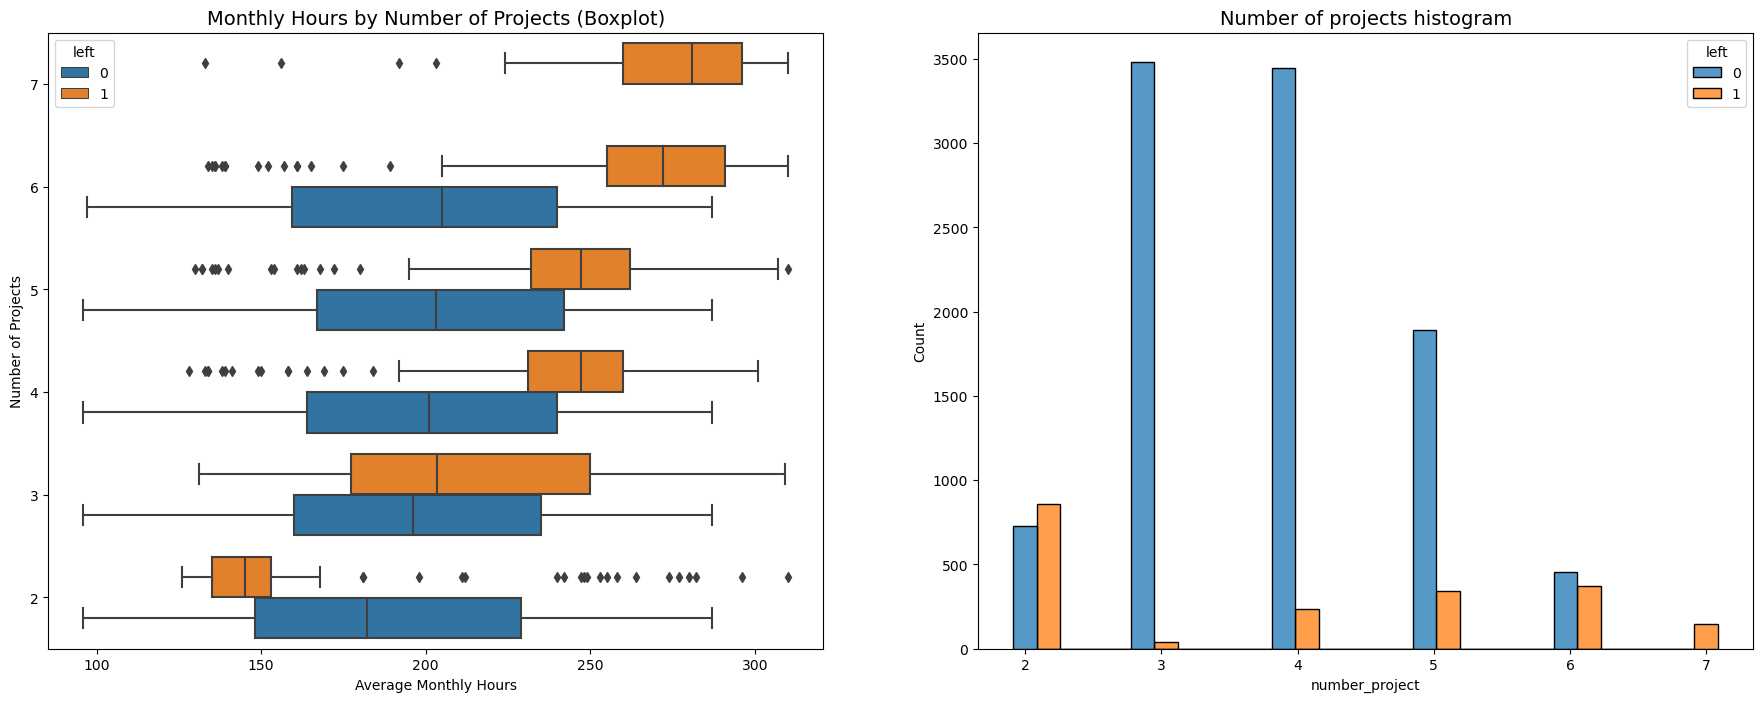

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=hr1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel("Average Monthly Hours")
ax[0].set_ylabel("Number of Projects")
ax[0].set_title('Monthly Hours by Number of Projects (Boxplot)', fontsize=14)


# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = hr1[hr1['left']==0]['number_project']
tenure_left = hr1[hr1['left']==1]['number_project']
sns.histplot(data=hr1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

### Insights

Working on multiple tasks may lead to longer hours. The average hours of each group (stayed and left) increases with project number.

From the diagrams, I can extrapolate that they are there are two distinct groups in the organisation. (A) Those who worked less than their counterparts with the same number of projects, and (B) those who worked more than their counterparts with the same number of projects. Group A may have been sacked or quit. This category may also include employees who gave notice and were given less hours since they were leaving. Group B would likely quit due to burn out. Group B probably contributed the most to their projects.

Everyone with seven projects left the organisation, and the interquartile ranges of this group and those with six projects were ~255–295 hours/week—more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is significantly small for these cohorts.

Assuming 40 hours per week and two weeks of vacation, employees work an average of 166.67 hours per month, indicating overwork among all groups, including those not leaving the company.

In [18]:
# Value counts of employees who stayed and left after 7 projects
stayed = hr1[hr1['number_project'] == 7]['left'].value_counts().get(0, 0)
print("Employees with 7 projects who stayed:", stayed)
print(' ')

left = hr1[hr1['number_project'] == 7]['left'].value_counts().get(1, 0)
print("Employees with 7 projects who left:", left)

Employees with 7 projects who stayed: 0
 
Employees with 7 projects who left: 145


The above output confirms that all employees with 7 projects did leave the company.

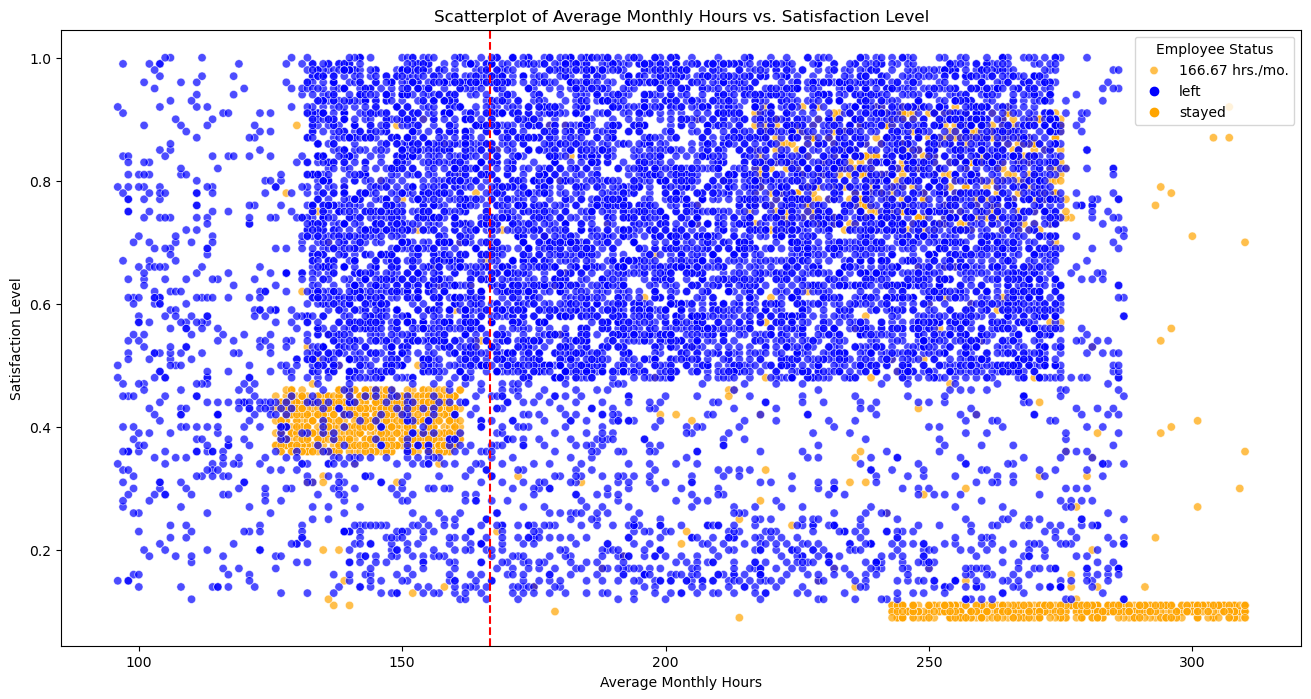

In [19]:
# Creating a plot to examine the average monthly hours versus the satisfaction levels.

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the scatterplot
sns.scatterplot(data=hr1, x='average_monthly_hours', y='satisfaction_level', hue='left', palette=["blue", "orange"], alpha=0.7)

# Add a horizontal line at average monthly hours value
plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./mo.')

# Set plot labels and title
plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.title("Scatterplot of Average Monthly Hours vs. Satisfaction Level")

# Show the legend
plt.legend(title="Employee Status", labels=['166.67 hrs./mo.', 'left', 'stayed'])

# Display the plot
plt.show()


The output from the scatterplot demonstrates that many employees worked 240–315 hours each month. 315 hours a month is 75 hours per week for a year. Giving reason to why they are probably dissatisfied.

Another group who left was those who worked below the mean working hours. However, their satisfaction was only 0.4. Why they left is unknown. They may have felt driven to work extra because so many of their colleagues did. That pressure may have affected their sense of satisfaction.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. The group is somewhat scattered unlike others and suggets some data manipultion might have taken place.

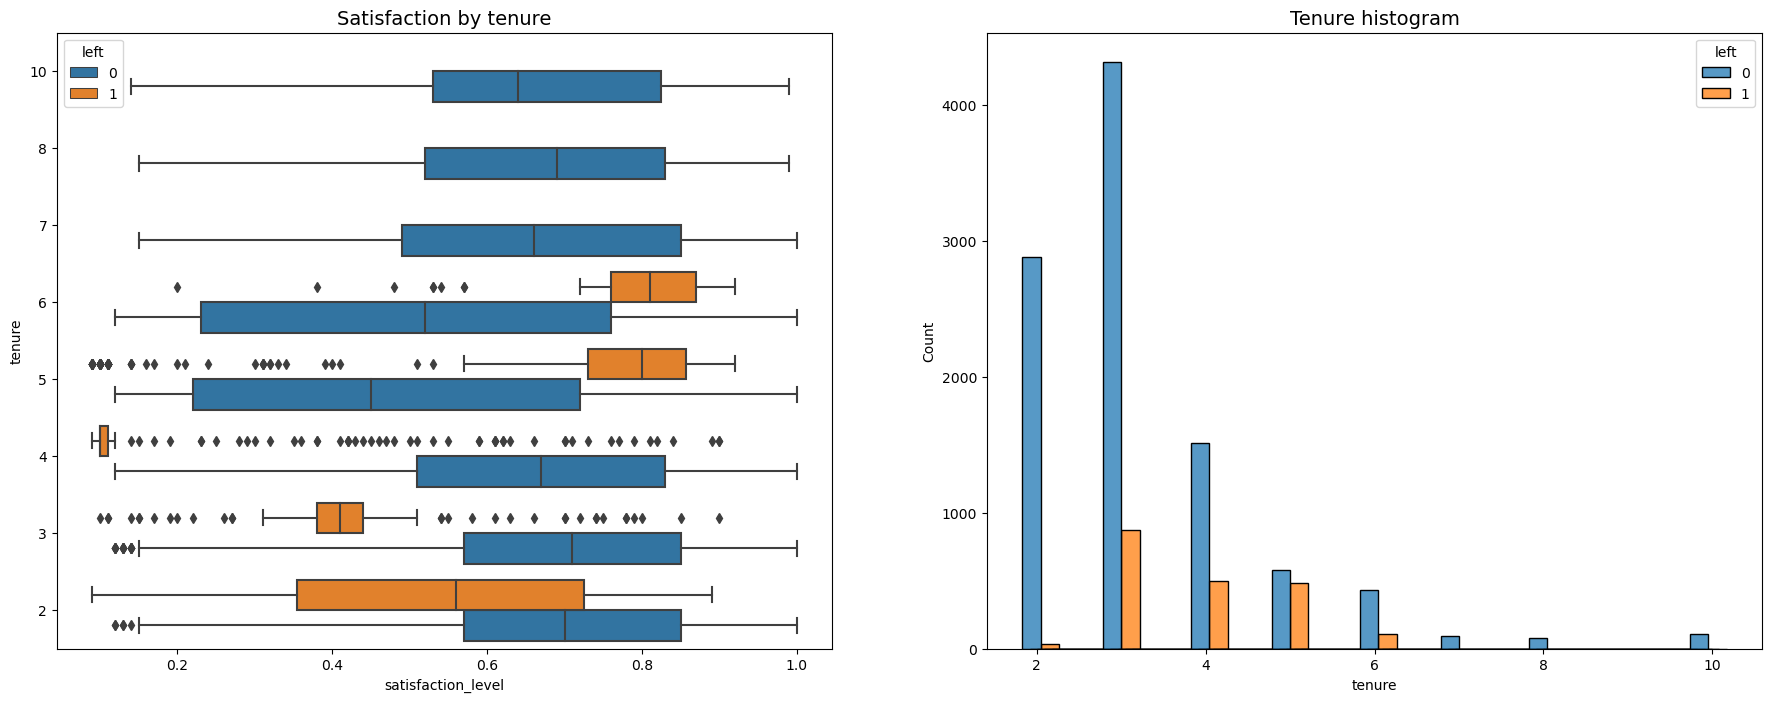

In [20]:
# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=hr1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = hr1[hr1['left']==0]['tenure']
tenure_left = hr1[hr1['left']==1]['tenure']
sns.histplot(data=hr1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

Observations from the plot.

Dissatisfied short-term employees and very satisfied medium-term employees left the company.

Four-year employees who quit look exceptionally dissatisfied. If possible. investigate company policy modifications that may have affected people at four years.

Long-term workers stayed. They were satisfied like newer employees who stayed.

The histogram reveals few long-term employees. They may be higher-ranking, higher-paid personnel.

In [21]:
# Grouping the DataFrame by 'left' column and calculating the mean and median satisfaction scores for each group

hr1.groupby('left')['satisfaction_level'].aggregate(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

Employees who left have lower mean and median satisfaction levels than those who stayed. Surprisingly, those who stayed had a mean satisfaction score below the median. This suggests that those who stayed may be less satisfied. As the graph is skewed to the left.

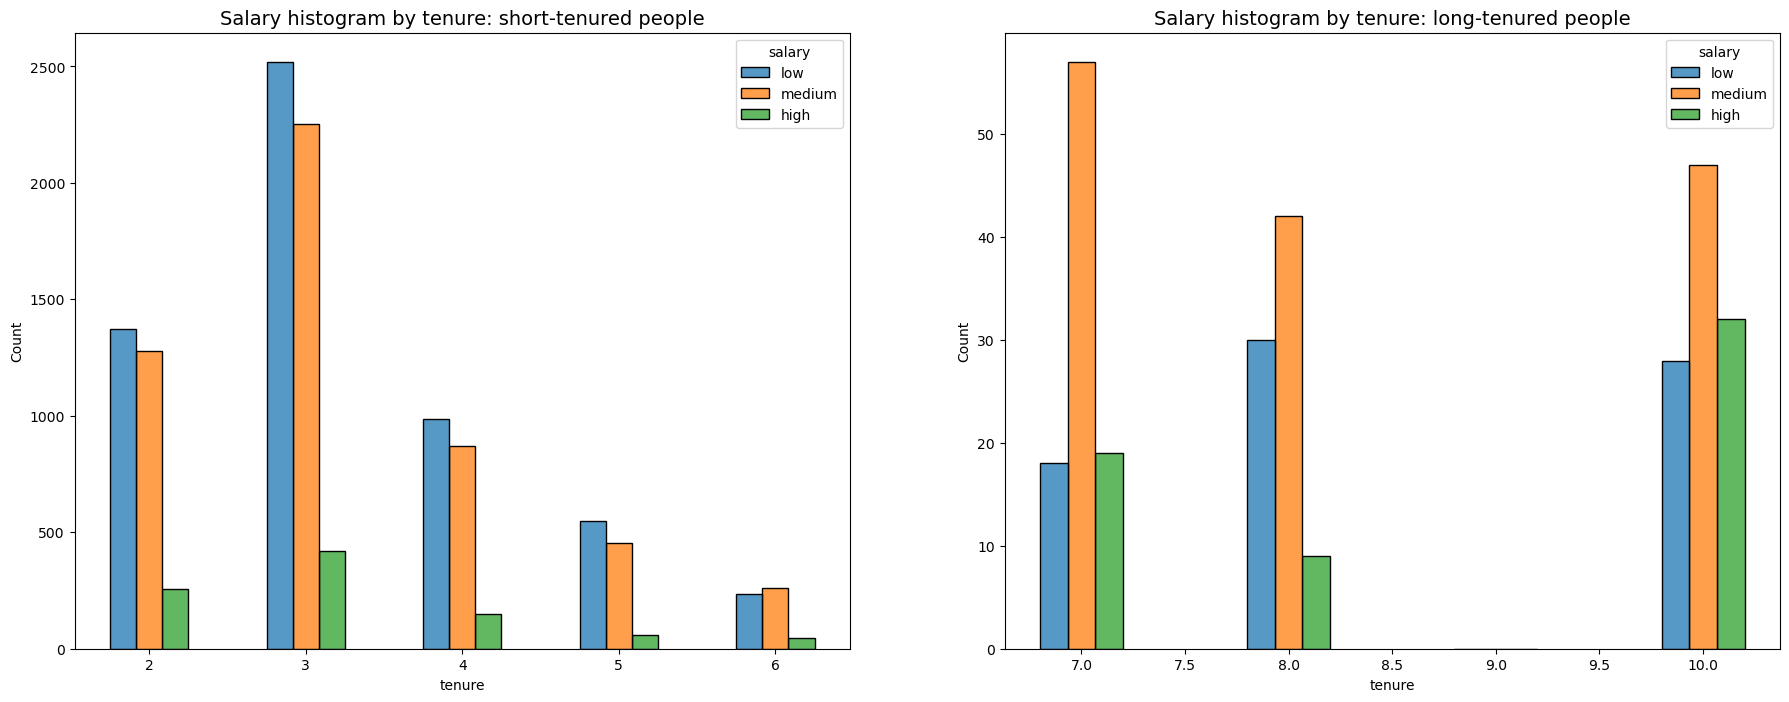

In [22]:
# Creating  plots to examine salary levels for different tenures.

# Define short-tenured employees
tenure_short = hr1[hr1['tenure'] < 7]

# Define long-tenured employees
tenure_long =hr1[hr1['tenure'] > 6]

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = hr1[hr1['tenure'] < 7]

# Define long-tenured employees
tenure_long = hr1[hr1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

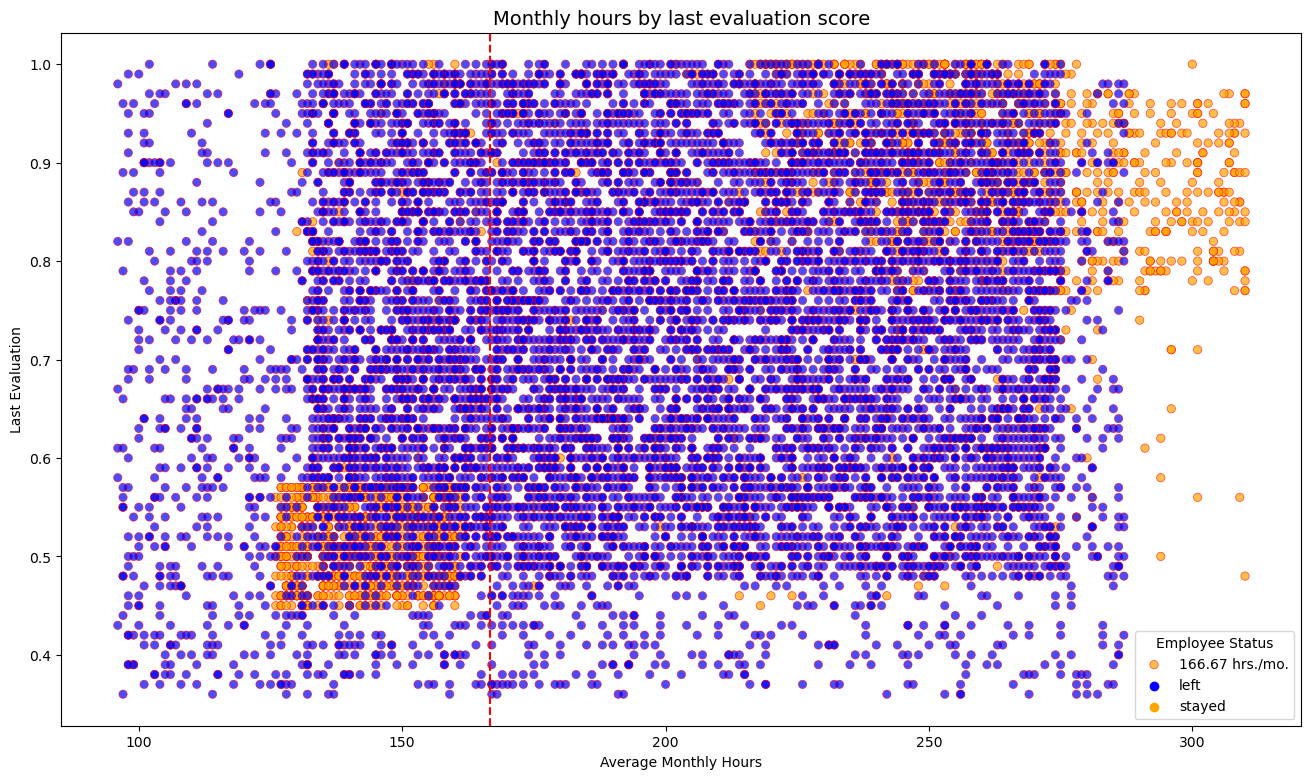

In [23]:
# Creating a plot to explore whether there's a correlation between working long hours and receiving high evaluation scores

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
# Set the figure size
plt.figure(figsize=(16, 9))

# Create scatterplot of average_monthly_hours versus last_evaluation
sns.scatterplot(data=hr1, x='average_monthly_hours', y='last_evaluation', hue='left', palette=['blue', 'orange'],
                edgecolor='red', linewidth=0.5, alpha= 0.7)
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')

# Add a horizontal line at average monthly hours value
plt.axvline(x=166.67, color='red', linestyle='--', label='166.67 hrs./mo.')

# Show the legend
plt.legend(title="Employee Status", labels=['166.67 hrs./mo.', 'left', 'stayed'])

# Display the plot
plt.show()

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. There seems to be a correlation between hours worked and evaluation score. There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score. Most of the employees in this company worked well over 167 hours per month.

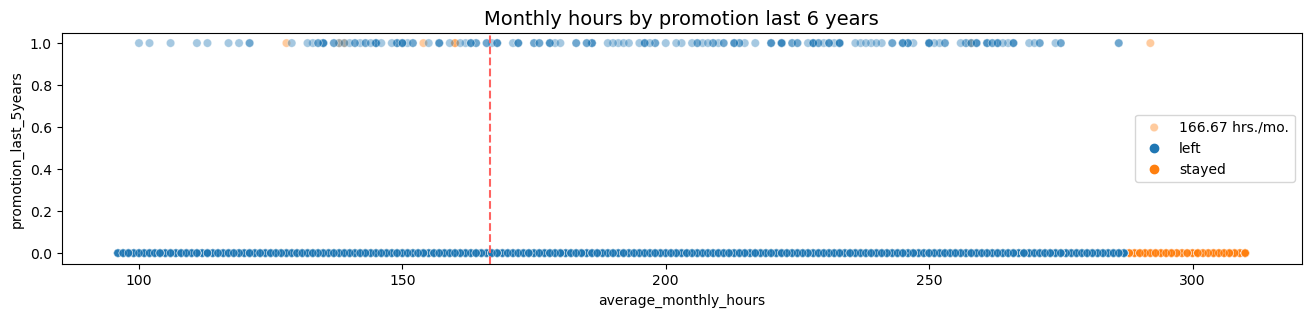

In [24]:
# Creating a plot to examine whether employees who worked very long hours were promoted in the last six years.
### YOUR CODE HERE ###

# Set the figure size

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_6years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=hr1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 6 years', fontsize='14');

The plot above shows the following:

Very few employees who were promoted in the last five years left 
Very few employees who worked the most hours were promoted 
All of the employees who left were working the longest hours Next, you could inspect how the employees who left are distributed across departments.

In [25]:
# Display counts for each department
hr1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

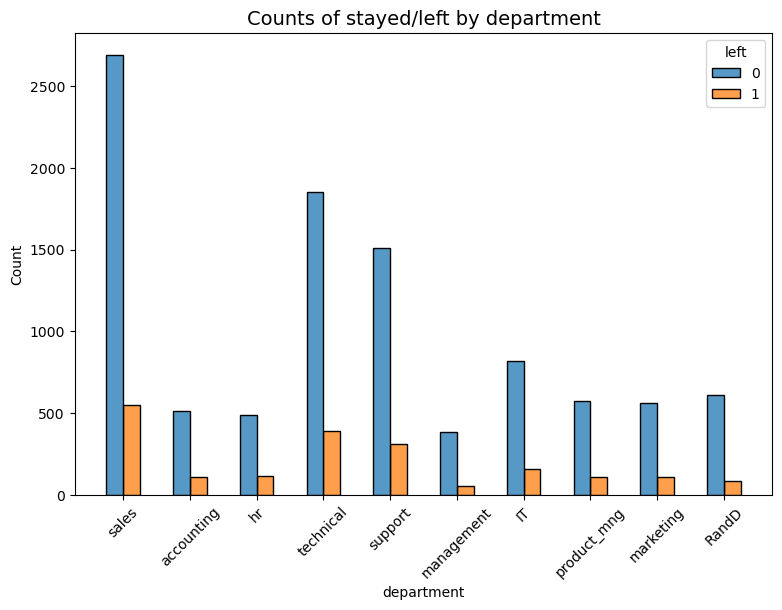

In [26]:
# Creating a histogram to compare department distribution for employees who left and stayed
plt.figure(figsize=(9, 6))
sns.histplot(data=hr1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

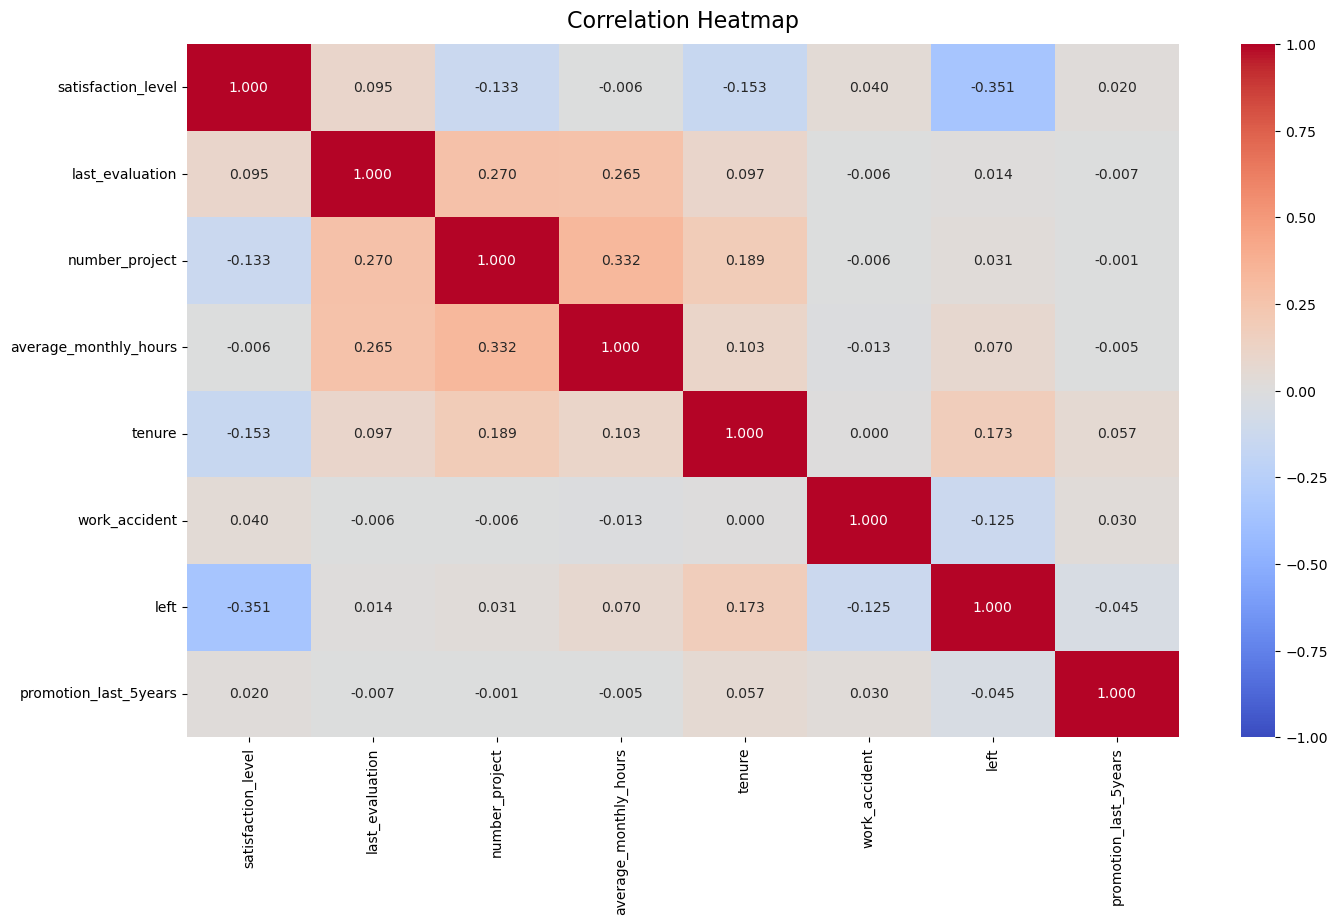

In [27]:
# Create a plot to check for strong correlations between variables in the data.

# Calculate the correlation matrix for numeric columns
# correlation_matrix = hr1.corr()

# Set the figure size
plt.figure(figsize=(16, 9))

# Plot the correlation heatmap
sns.heatmap(hr1.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap', fontsize=16, pad=12)

# Display the plot
plt.show()


The correlation heatmap verifies that the number of projects, monthly hours, and evaluation scores all have a positive correlation with one another, and that an employee's satisfaction level is negatively correlated with their likelihood of leaving.

### Insights

It appears that employees are leaving the organisation due to ineffective management. Leaving is associated with longer working hours, many projects, and generally lower levels of satisfaction. It can be demoralising to work lengthy hours without receiving promotions or favourable evaluations. Significant numbers of employees at this company are likely exhausted. Furthermore, it appears that employees who have spent more than six years at the company are less likely to depart.

### Step 3. Model Building, Step 4. Results and Evaluation
Fit a model that predicts the outcome variable using two or more independent variables
Check model assumptions
Evaluate the model

### Identification the type of prediction task.

The goal of this project is to predict whether an employee leaves the company, which is a categorical outcome variable. Hence, this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

#### Modeling Approach B: Tree-based Model

I will be using Decision Tree and Random Forest.

Before splitting the data,I will encode the non-numeric variables. There are two: (department and salary). department is a categorical variable, salary is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0–2.

In [30]:
# Coping the dataframe
df_enc = hr1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Due to the sensitivity of logistic regression to outliers, it would be prudent at this juncture to eliminate the previously identified outliers in the tenure column.

In [32]:
# Selecting rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

In [31]:
# Isolating the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Selectiing the features.

In [33]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

###### Spliting the data into training, validating, and testing sets.

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

###### Decision tree - Round 1

Constructing a decision tree model and configuring cross-validated grid-search to search exhaustively for the optimal model parameters.

In [37]:
# Instantiating the model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the Decision tree model to the training data.

In [39]:
%%time
tree1.fit(X_train, y_train) 

CPU times: total: 5.28 s
Wall time: 5.39 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'roc_auc', 'f1', 'precision'})

Identify the optimal values for the decision tree parameters.

In [40]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [41]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

The above output  is a high AUC score, indicating that this model can predict departing employees very accurately.

In [42]:
# A function that will help extract all the scores from the grid search

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


Use the above function to get all the scores from grid search.

In [43]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

From the above output, all of these scores from the decision tree model are significant indicators of a successful model. However, Decision trees are vulnerable to overfitting; but random forests avoid it by incorporating multiple trees.

##### Random forest - Round 1

Constructing a Random forest model and setting up cross-validated grid-search to search exhaustively for the optimal model parameters.

In [44]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [ ]:
Fit the Random forest model to the training data.

In [45]:
%%time
rf1.fit(X_train, y_train)# --> Wall time: ~31min

CPU times: total: 30min 55s
Wall time: 31min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'roc_auc', 'f1', 'precision'})

Specifying a path to where I want to save the model.

In [51]:
path = "C:\\Users\\USER\\Documents\\Python Scripts"


Defining functions to pickle the model and read in the model

In [52]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [53]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the above functions to save the model in a pickle file and then read it in.

In [54]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [55]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identifying the best AUC score achieved by the random forest model on the training set.

In [56]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [57]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [58]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are superior to those of the decision tree model, except for recall (the recall score of the random forest model is approximately 0.001 points lower, which is insignificant). This suggests that the random forest model performs significantly better than the decision tree model.

In [59]:
# Define a function that gets all the scores from a model's predictions.

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [60]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The correlation between the test scores and the validation scores is excellent. This appears to be a solid example. Since this test set was created specifically for this model, you can be more confident that the performance of your model on these data is representative of its performance on new, unseen data.

###### Feature Engineering

I am somewhat sceptical about the high evaluation scores. There is a possibility that data is being compromised. Data leakage occurs when you use data to train your model that should not be used for training, either because it appears in the test data or because it is not data you would expect to have when the model is deployed. When training a model with exposed data, the resulting score may be unrealistic and not replicated in production.

In this situation, it is probable that not all employees' satisfaction levels will be reported. It is also conceivable that the [average_monthly_hours] column contributes to data leakage. Employees who have already decided to resign or who have been identified by management as candidates for termination may be working fewer hours.


In the initial iteration of decision tree and random forest models, all variables were included as features. This subsequent iteration will integrate feature engineering to produce more accurate models.

I would proceed by dropping [satisfaction_level] and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature [overworked]. It will be a binary variable.

In [61]:
# Droping `satisfaction_level` and save resulting dataframe in new variable
hr2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
hr2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [62]:
# Create `overworked` column. For now, it's identical to average monthly hours.
hr2['overworked'] = hr2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', hr2['overworked'].max())
print('Min hours:', hr2['overworked'].min())

Max hours: 310
Min hours: 96


The average number of hours worked per month by someone who works 50 weeks per year, 5 days per week, and 8 hours per day is approximately 166.67. I will define being overworked as working more than 175 hours per month on average.
To make the overworked column binary, you could reassign the column using a boolean mask.

df2['overworked'] > 175 creates a series of booleans, consisting of [True] for every value > 175 and [False] for every values ≤ 175
.astype(int) converts all True to 1 and all False to 0

In [63]:
# Define `overworked` as working > 175 hrs/week
hr2['overworked'] = (hr2['overworked'] > 175).astype(int)

# Display first few rows of new column
hr2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Droping the [average_monthly_hours] column.

In [64]:
# Drop the `average_monthly_hours` column
hr2 = hr2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
hr2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

In [65]:
# Isolating the outcome variable
y = hr2['left']

# Select the features
X = hr2.drop('left', axis=1)

Spliting the data into training and testing sets.

In [66]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

###### Decision tree - Round 2

In [67]:
# Instantiating model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [68]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 3.92 s
Wall time: 4.01 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'roc_auc', 'f1', 'precision'})

In [69]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [70]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [71]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores decreased. This is to be anticipated given that fewer features were considered in this model iteration. Nonetheless, the scores are very good.

#### Random forest - Round 2

In [74]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [75]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 24min 37s
Wall time: 25min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'recall', 'accuracy', 'roc_auc', 'f1', 'precision'})

In [76]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [77]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [78]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [79]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [80]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Using AUC as the deciding metric, the random forest outperforms the decision tree despite marginally lower scores.

In [81]:
# Getting predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

This seems to be a stable, well-performing final model.

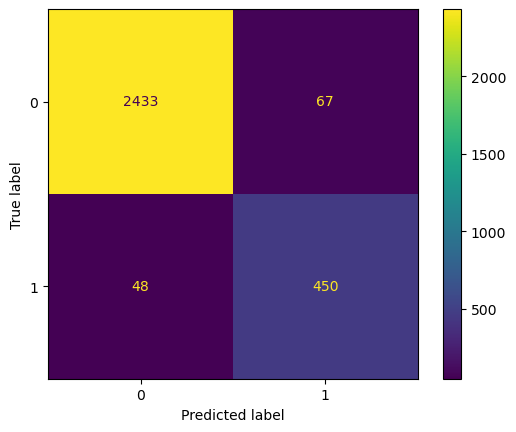

In [82]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts a greater number of false positives than false negatives, meaning that some employees may be identified as being at risk of quitting or being dismissed when, in reality, they are not. 
For exploratory purpose, I  want to inspect the splits of the decision tree model and the most important features in the random forest model.

###### Decision tree splits

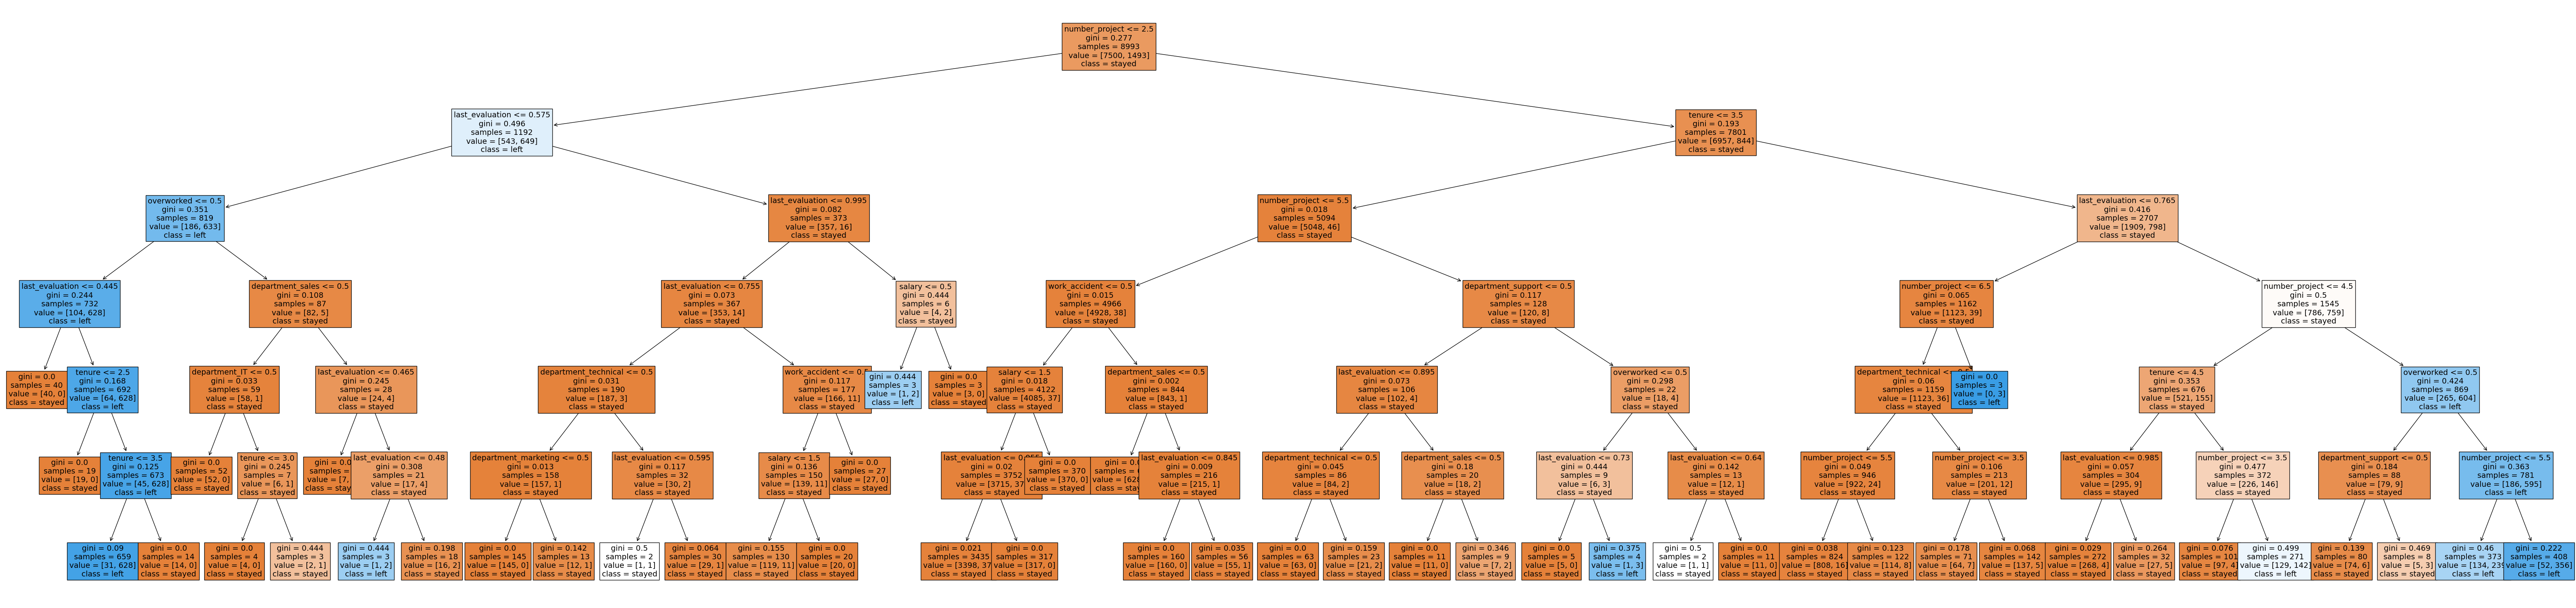

In [83]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

###### Decision tree feature importance

In [84]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

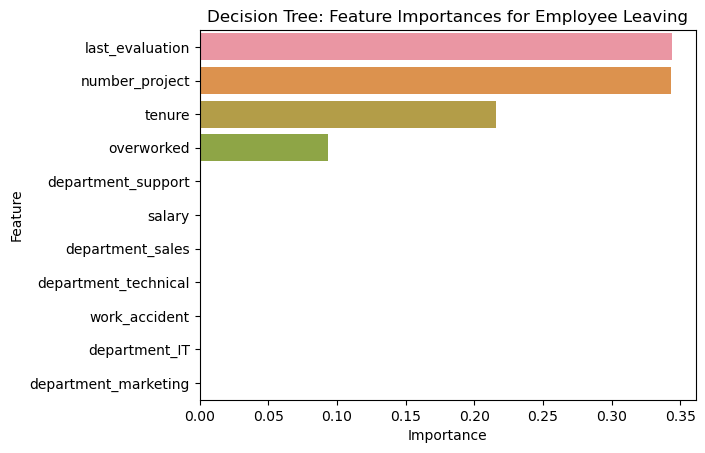

In [85]:
##### creating a barplot to visualize the decision tree feature importances.

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, [last_evaluation], [number_project], [tenure], and [overworked] have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

###### Random forest feature importance

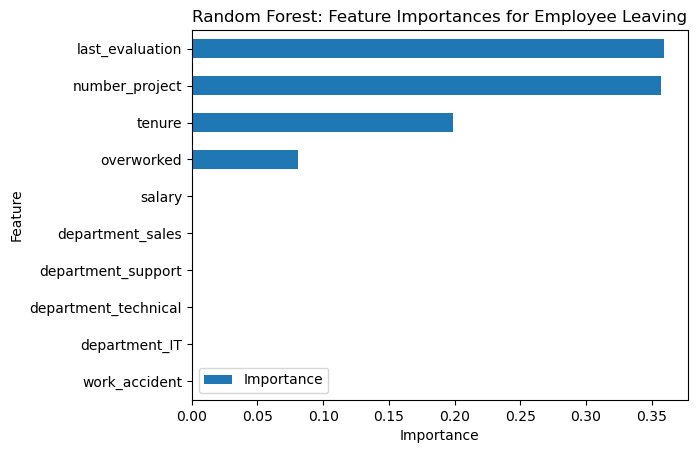

In [86]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

##### Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

##### Conclusion, Recommendations, Next Steps

The following recommendations would be presented to stakeholders in order to retain employees:

Limit the number of projects employees can simultaneously work on. Consider promoting employees who have been with the company for at least four years, or investigate why employees with a four-year tenure are so dissatisfied.

Either compensate workers for working extended hours, or do not require it.

Inform employees if they are unfamiliar with the company's overtime pay policies. If the workload and time off expectations are not explicit, make them so.

Conduct company-wide and team-specific discussions to comprehend and address the company's work culture, both generally and in particular contexts.

High evaluation scores should not be designated for workers who put in 200 or more hours per month. Consider a proportional scale for rewarding employees with greater contributions/efforts.

##### Next Steps
It may still be reasonable to be concerned about data leakage. When [last_evaluation] is removed from the data, it may be prudent to consider how predictions change. In the event that evaluations are not conducted frequently, it would be advantageous to be able to predict employee retention without this factor. It is also possible that the evaluation score determines whether an employee remains or departs, in which case it would be advantageous to pivot and attempt to predict performance score. The same holds true for customer satisfaction.